806 1134
306.5


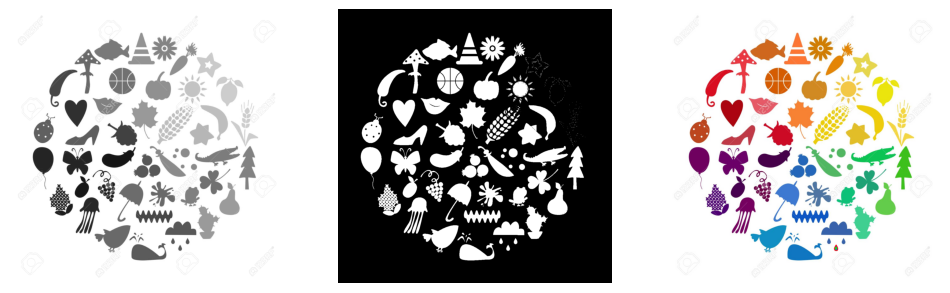

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('elementos.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binario = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)
contornos, _ = cv2.findContours(binario, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contar = contornos[0]
momento = cv2.moments(contar)

cX = int(momento["m10"] / momento["m00"])
cY = int(momento["m01"] / momento["m00"])
print(cX, cY)

area = cv2.contourArea(contar)
print(area)

perimetro = cv2.arcLength(contar, True)

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.circle(rgb, (cX, cY), 5, (0, 255, 0), -1)
cv2.drawContours(rgb, [contar], -1, (255, 0, 0), 2)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gris, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binario, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb)
plt.axis('off')

plt.show()
